<a href="https://www.kaggle.com/code/shubhamsoni07/2022-regression-data-challenge?scriptVersionId=91581686" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-regression-data-challenge/submission.csv
/kaggle/input/2022-regression-data-challenge/train.csv
/kaggle/input/2022-regression-data-challenge/test.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# loading the data into pandas dataFrame
train_data = pd.read_csv('/kaggle/input/2022-regression-data-challenge/train.csv')
test_data = pd.read_csv('/kaggle/input/2022-regression-data-challenge/test.csv')
sub_data = pd.read_csv('/kaggle/input/2022-regression-data-challenge/submission.csv')

In [4]:
# frist five rows of the train data
train_data.head()

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,403,34.130,0.00243,0.000018,0.00108,0.00124,0.00323,0.01147,0.105,0.00625,...,-0.824511,-1.217875,-0.432389,-1.455320,-0.280675,0.681113,0.375320,0.764563,-0.237859,-0.282198
1,1477,19.000,0.00280,0.000021,0.00087,0.00128,0.00260,0.01575,0.137,0.00812,...,0.080466,-0.812559,1.512731,0.070331,2.368754,-0.256309,1.315997,0.093631,-0.389538,1.396095
2,5342,43.104,0.00412,0.000028,0.00162,0.00213,0.00487,0.02644,0.242,0.01150,...,-0.060555,-0.027766,-0.123652,0.820478,1.054439,1.922146,-1.262435,2.017997,0.687229,-0.935456
3,3812,38.814,0.00781,0.000043,0.00451,0.00399,0.01353,0.02975,0.261,0.01650,...,-0.153332,-1.298289,1.410486,1.950012,0.613255,0.492419,0.124454,0.891332,0.401179,0.383195
4,138,41.034,0.00488,0.000026,0.00265,0.00251,0.00794,0.04983,0.448,0.02688,...,-0.985639,-0.469064,-2.579920,0.173884,-0.330941,0.089597,0.617369,-0.183967,0.408726,1.607871


In [5]:
# last five rows of the training data
train_data.tail()

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
4136,1835,34.945,0.00396,0.000021,0.00202,0.00194,0.00606,0.01801,0.168,0.00931,...,-0.059465,-2.339619,0.191836,-0.550948,-2.254442,-0.687316,-1.689359,-0.390774,-0.639883,0.301319
4137,5803,29.835,0.00829,0.000069,0.00360,0.00260,0.01079,0.04467,0.406,0.02295,...,0.272747,-0.929431,-0.271502,-1.885880,-0.799171,0.974449,1.539181,-0.815626,-0.937127,-0.190968
4138,3390,46.674,0.00292,0.000030,0.00136,0.00154,0.00408,0.02045,0.178,0.00968,...,0.833592,-0.775009,-0.032361,-0.113071,-0.475901,-0.573549,-0.061487,0.577916,0.750130,0.398217
4139,2851,38.569,0.00360,0.000030,0.00188,0.00213,0.00564,0.04781,0.423,0.02545,...,0.007326,0.901621,-1.354483,-0.110579,-0.551393,-0.167491,0.246069,-1.410998,0.952076,2.281595
4140,3487,34.101,0.00696,0.000066,0.00279,0.00334,0.00837,0.06905,0.589,0.03621,...,0.638871,0.705895,2.059627,0.685758,1.001804,-0.889843,0.225451,-0.039073,-0.589991,-1.027950


In [6]:
# now the shape of the train and test data
print('Train data shape: ',train_data.shape)
print('Test data shape: ',test_data.shape)

Train data shape:  (4141, 29)
Test data shape:  (1734, 28)


In [7]:
# checking data for missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

The above train data doesn't have any missing value,which is really good things.

In [8]:
#s# stastical measure of the train data
train_data.describe()

,Id,score,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,...,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,2940.652499,29.121340,0.006104,0.000044,0.002964,0.003245,0.008893,0.034051,0.311054,0.017160,...,-0.012633,-0.025192,-0.000963,0.014772,0.008972,-0.007462,-0.016772,-0.000486,-0.005106,-0.018972
std,1699.192364,10.755535,0.005490,0.000035,0.003076,0.003616,0.009229,0.025476,0.227168,0.013016,...,1.001635,1.000682,1.008123,0.989822,0.996655,0.988960,1.026635,1.000286,0.990513,1.003466
min,1.000000,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,...,-3.380800,-3.478111,-3.477503,-3.640632,-4.101566,-3.325202,-4.181709,-3.271369,-3.914810,-3.940039
25%,1475.000000,21.371000,0.003600,0.000023,0.001590,0.001830,0.004780,0.019260,0.177000,0.009310,...,-0.686830,-0.710558,-0.684078,-0.653262,-0.667845,-0.677333,-0.710010,-0.684800,-0.667930,-0.719007
50%,2946.000000,27.630000,0.004900,0.000035,0.002250,0.002480,0.006760,0.027750,0.255000,0.013770,...,-0.016551,-0.041247,0.010535,0.019838,0.012707,-0.014778,-0.022363,-0.017580,-0.020160,-0.018618
75%,4415.000000,36.483000,0.006770,0.000053,0.003270,0.003430,0.009800,0.039990,0.366000,0.020690,...,0.656291,0.660537,0.662715,0.676001,0.678279,0.649582,0.657142,0.643342,0.641950,0.659158
max,5873.000000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,...,3.521048,4.089038,3.415772,3.771027,3.904879,3.628111,4.551681,3.833876,3.459594,3.540049


In [9]:
# statsical measure for the test dataset
test_data.describe()

,Id,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,...,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,2931.665513,0.006273,0.000045,0.003042,0.003353,0.009126,0.033997,0.310736,0.017147,0.020092,...,-0.006704,0.012978,-0.011451,0.019566,-0.027161,0.010752,-0.024092,0.012603,0.027469,-0.003931
std,1689.200809,0.005934,0.000039,0.003235,0.003993,0.009704,0.026681,0.237528,0.013754,0.017296,...,0.973466,1.035927,1.005044,0.977753,1.009405,1.020541,0.986471,1.010628,0.993477,1.001554
min,2.000000,0.001230,0.000004,0.000450,0.000550,0.001360,0.004060,0.035000,0.002140,0.002330,...,-3.727507,-3.675447,-3.773363,-3.525800,-3.311316,-3.252879,-3.131847,-3.626690,-3.236114,-3.778423
25%,1456.500000,0.003500,0.000022,0.001540,0.001780,0.004622,0.018953,0.173000,0.009153,0.010752,...,-0.684114,-0.679197,-0.703458,-0.626586,-0.698278,-0.664171,-0.748346,-0.661113,-0.674587,-0.663363
50%,2921.500000,0.004900,0.000034,0.002240,0.002490,0.006720,0.027085,0.248000,0.013435,0.015660,...,0.001131,0.046411,-0.058246,-0.010909,-0.029615,0.016555,-0.050449,0.018561,0.032338,-0.016217
75%,4389.250000,0.006857,0.000053,0.003368,0.003540,0.010100,0.039068,0.357000,0.020168,0.022857,...,0.664482,0.725248,0.652507,0.650645,0.626596,0.730491,0.680231,0.719606,0.689523,0.691986
max,5875.000000,0.085890,0.000396,0.049610,0.057240,0.148830,0.268630,2.107000,0.144280,0.167020,...,3.255268,3.599798,3.262071,3.370217,4.596656,3.390870,3.630115,3.000444,3.187536,3.231160


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


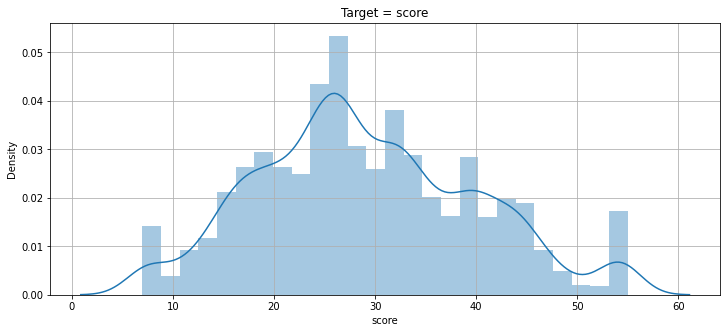

In [10]:
# here the target is score 
plt.figure(figsize=(12,5))
sns.distplot(train_data['score'])
plt.title('Target = ' + 'score')
plt.grid(True)
plt.show()

Finding the correlation amongs the columns. There are two type correlation: 
1. postive correlation
2. negative correlation

<AxesSubplot:>

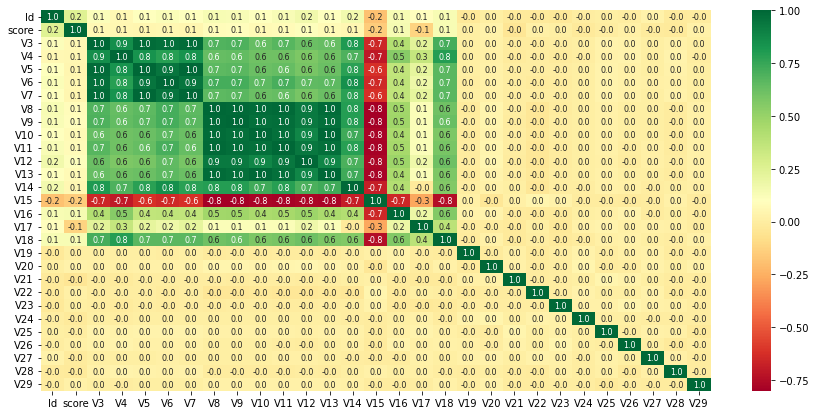

In [11]:
correlation = train_data.corr()
# ploting the heatmap for understanding the dataset
plt.figure(figsize = (15,7))
sns.heatmap(correlation,cbar =True,fmt = '0.01f',annot = True,cmap="RdYlGn", annot_kws = {'size':8 })

As we can see from the heatmap, only features from V3 to V18 are correlated, so we can labelling this as features and target is score.

In [12]:
# labelling the features on train data
X_train = train_data.drop(['Id','score'],axis = 1)
Y_train = train_data['score']

In [13]:
# labelling on the data 
X_test = test_data.drop(['Id'],axis = 1)
X_test.shape

(1734, 27)

In [14]:
X_train.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,0.00243,0.000018,0.00108,0.00124,0.00323,0.01147,0.105,0.00625,0.00658,0.00834,...,-0.824511,-1.217875,-0.432389,-1.455320,-0.280675,0.681113,0.375320,0.764563,-0.237859,-0.282198
1,0.00280,0.000021,0.00087,0.00128,0.00260,0.01575,0.137,0.00812,0.00868,0.01072,...,0.080466,-0.812559,1.512731,0.070331,2.368754,-0.256309,1.315997,0.093631,-0.389538,1.396095
2,0.00412,0.000028,0.00162,0.00213,0.00487,0.02644,0.242,0.01150,0.01423,0.02545,...,-0.060555,-0.027766,-0.123652,0.820478,1.054439,1.922146,-1.262435,2.017997,0.687229,-0.935456
3,0.00781,0.000043,0.00451,0.00399,0.01353,0.02975,0.261,0.01650,0.01610,0.02198,...,-0.153332,-1.298289,1.410486,1.950012,0.613255,0.492419,0.124454,0.891332,0.401179,0.383195
4,0.00488,0.000026,0.00265,0.00251,0.00794,0.04983,0.448,0.02688,0.02876,0.04052,...,-0.985639,-0.469064,-2.579920,0.173884,-0.330941,0.089597,0.617369,-0.183967,0.408726,1.607871


In [15]:
X_test.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,0.00465,0.000021,0.00253,0.00254,0.00760,0.01743,0.184,0.00858,0.00974,0.01495,...,-0.622937,-0.345015,-0.172781,1.632996,-0.819828,1.026481,-1.395062,1.065962,-1.854161,0.424490
1,0.03805,0.000184,0.01723,0.02981,0.05170,0.15431,1.450,0.07356,0.13302,0.13644,...,-0.563150,-0.403509,-1.149322,0.152665,-0.053284,-0.287827,-0.119217,0.612956,-0.731272,-0.608852
2,0.01094,0.000123,0.00429,0.00502,0.01288,0.04010,0.368,0.01749,0.02065,0.03685,...,0.077701,-0.061947,0.581850,-0.059723,0.226147,1.613662,0.114775,0.170831,0.159562,-0.571270
3,0.00414,0.000022,0.00183,0.00233,0.00550,0.03073,0.272,0.01636,0.02040,0.02387,...,-0.106470,0.923359,-1.290854,0.959982,0.232197,-0.669471,-0.049756,-0.110285,0.437221,-1.399420
4,0.00688,0.000041,0.00390,0.00307,0.01171,0.04896,0.419,0.03117,0.02345,0.03018,...,-0.216855,0.516351,1.194716,-0.451112,-0.063620,-1.356854,-0.093523,0.219119,0.943376,0.146435


X is true feature of the dataset and target is Y (score)

In [16]:
X_train.describe()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,...,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000,4141.000000
mean,0.006104,0.000044,0.002964,0.003245,0.008893,0.034051,0.311054,0.017160,0.020166,0.027513,...,-0.012633,-0.025192,-0.000963,0.014772,0.008972,-0.007462,-0.016772,-0.000486,-0.005106,-0.018972
std,0.005490,0.000035,0.003076,0.003616,0.009229,0.025476,0.227168,0.013016,0.016394,0.019818,...,1.001635,1.000682,1.008123,0.989822,0.996655,0.988960,1.026635,1.000286,0.990513,1.003466
min,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,...,-3.380800,-3.478111,-3.477503,-3.640632,-4.101566,-3.325202,-4.181709,-3.271369,-3.914810,-3.940039
25%,0.003600,0.000023,0.001590,0.001830,0.004780,0.019260,0.177000,0.009310,0.010820,0.015620,...,-0.686830,-0.710558,-0.684078,-0.653262,-0.667845,-0.677333,-0.710010,-0.684800,-0.667930,-0.719007
50%,0.004900,0.000035,0.002250,0.002480,0.006760,0.027750,0.255000,0.013770,0.016080,0.022960,...,-0.016551,-0.041247,0.010535,0.019838,0.012707,-0.014778,-0.022363,-0.017580,-0.020160,-0.018618
75%,0.006770,0.000053,0.003270,0.003430,0.009800,0.039990,0.366000,0.020690,0.024000,0.032920,...,0.656291,0.660537,0.662715,0.676001,0.678279,0.649582,0.657142,0.643342,0.641950,0.659158
max,0.099990,0.000446,0.057540,0.069560,0.172630,0.239150,1.970000,0.162670,0.162460,0.275460,...,3.521048,4.089038,3.415772,3.771027,3.904879,3.628111,4.551681,3.833876,3.459594,3.540049


In [17]:
print(Y_train)

0       34.130
1       19.000
2       43.104
3       38.814
4       41.034
         ...  
4136    34.945
4137    29.835
4138    46.674
4139    38.569
4140    34.101
Name: score, Length: 4141, dtype: float64


In [18]:
print('Featues shape :',X_train.shape)
print('Target shape: ',Y_train.shape)

Featues shape : (4141, 27)
Target shape:  (4141,)


Let's train our model with different- different model and see which one is making good predication

**Model Training with RandomForestRegressor**

In [19]:
lin_reg = RandomForestRegressor()
lin_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [20]:
train_data_prediction = lin_reg.predict(X_train)
accuracy = mean_squared_error(Y_train, train_data_prediction)
print('Root Mean square error: ', lin_reg,' = ', np.sqrt(accuracy))
print('R2 accuracy : ',r2_score(Y_train, train_data_prediction))

Root Mean square error:  RandomForestRegressor()  =  3.27697708098451
R2 accuracy :  0.9071487728417007


Text(0, 0.5, 'Actual values')

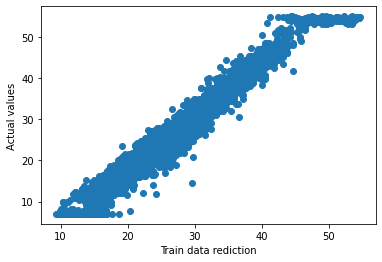

In [21]:
plt.scatter( train_data_prediction,Y_train)
plt.xlabel('Train data rediction')
plt.ylabel('Actual values')

**Training with XG Boost regressor**

In [22]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
train_data_prediction = xg_reg.predict(X_train)
accuracy = mean_squared_error(Y_train, train_data_prediction)
print('Accuracy score for the ', xg_reg,' = ', np.sqrt(accuracy))
print('R2 accuracy : ',r2_score(Y_train, train_data_prediction))

Accuracy score for the  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)  =  2.2513914635758745
R2 accuracy :  0.9561728863333081


Text(0, 0.5, 'Actual values')

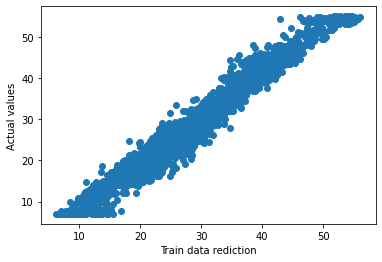

In [24]:
plt.scatter( train_data_prediction,Y_train)
plt.xlabel('Train data rediction')
plt.ylabel('Actual values')

In [25]:
# maiking prediction with  ExtraTreesRegressor
ex_reg =  ExtraTreesRegressor()
ex_reg.fit(X_train,Y_train)

ExtraTreesRegressor()

In [26]:
train_data_prediction = ex_reg.predict(X_train)
accuracy = mean_squared_error(Y_train, train_data_prediction)
print('Accuracy score for the ', ex_reg,' = ', np.sqrt(accuracy))
print('R2 accuracy : ',r2_score(Y_train, train_data_prediction))

Accuracy score for the  ExtraTreesRegressor()  =  4.0409635544084445e-14
R2 accuracy :  1.0


Making predition on test data with RandomForestRegresso model

In [27]:
X_test_prediction = xg_reg.predict(X_test)
X_test_prediction

array([30.834322, 28.981133, 26.974796, ..., 36.176598, 20.683657,
       29.347878], dtype=float32)

In [28]:
output = pd.DataFrame({'Id': test_data.Id, 'Expected': X_test_prediction})
output.to_csv('/kaggle/working/submission_predi.csv', index=False)
print("Your submission was successfully saved!")
# output /kaggle/working

Your submission was successfully saved!


In [29]:
os.listdir()

['__notebook__.ipynb', 'submission_predi.csv']